# ClusterAl 2020


# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521
# Caso comercial de venta de refrigerante

#### Docente: Martin Palazzo
#### Ayudante: Agustin Velazquez



##### Alumnos: Contreras, Manuel
#####                   De Leo, Andres
#####                   Tondini, Eduardo Matias

# 1-Importacion de Librerias

### Librerias basicas

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Librerias de Scikit Learn para distintos modelos de clasificacion

In [38]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Librerias de Feature Selection y PCA

In [39]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import VarianceThreshold
# Importamos librerias de PCA
from sklearn.decomposition import PCA

# 2- Importacion del dataset y computacion de sus caracteristicas

In [40]:
data_training= pd.read_csv(r"C:\Users\Asus\Desktop\cs de datos palazzo\ECI_2020.csv", parse_dates=True)

In [41]:
data_training.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [42]:
data_training.shape

(16947, 52)

# 2- Visualizaciones

Para mayor entendimiento de los datos.

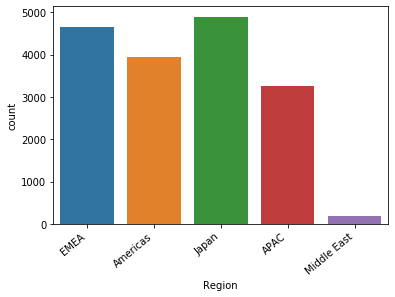

In [43]:
ax = sns.countplot(x="Region", data=data_training)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()


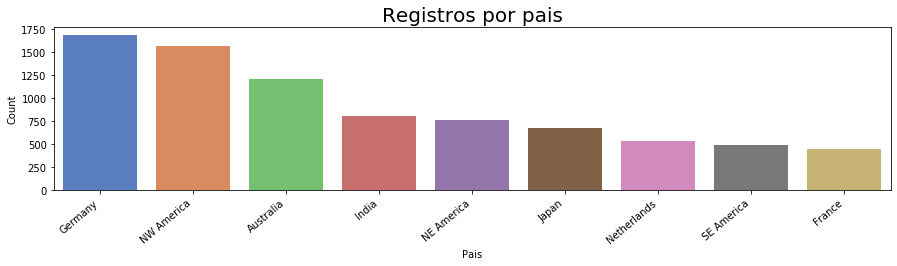

In [44]:
top_countries = data_training['Territory'].value_counts().index[1:10]

#Se empieza a contar desde el 1 porque contando desde el 0, el pais con mayor cantidad de registros es "None"
plt.figure(figsize=(15,3))
g = sns.countplot(data_training['Territory'], palette = "muted",order=top_countries)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Registros por pais',size = 20)
plt.xlabel("Pais")
plt.ylabel("Count")
plt.show()

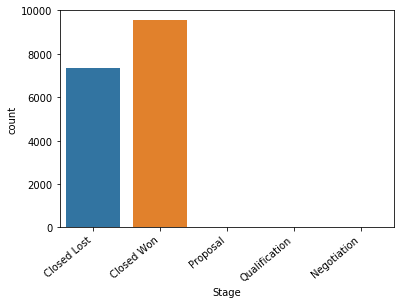

In [45]:
ax = sns.countplot(x="Stage", data=data_training)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

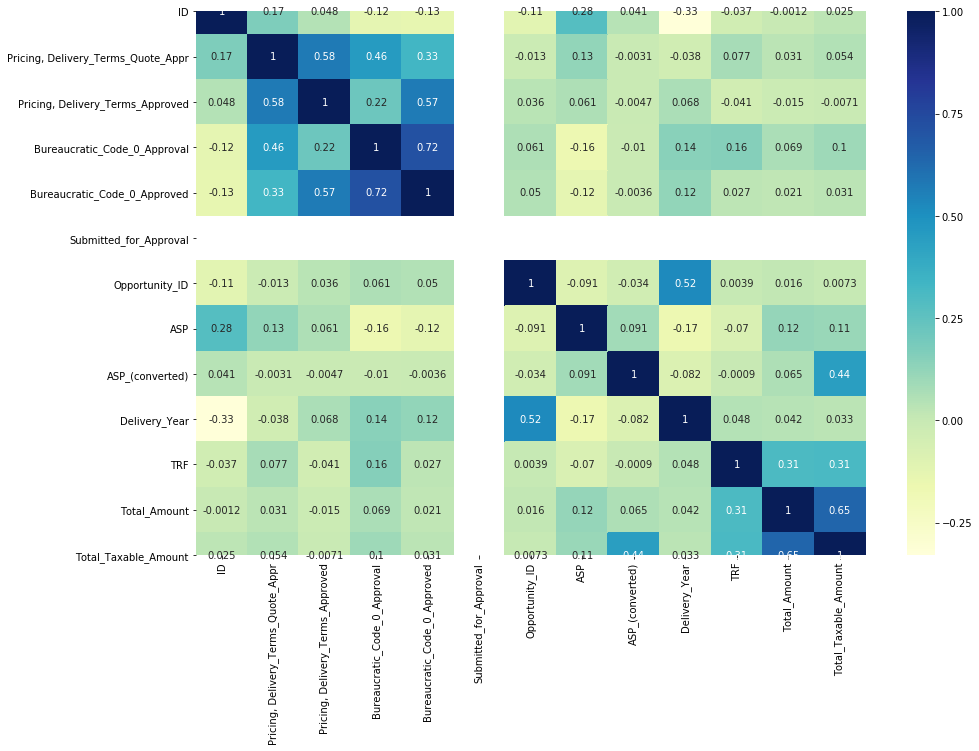

In [46]:
plt.figure(figsize = (15,10))
sns.heatmap(data_training.corr('pearson'), annot= True, cmap="YlGnBu")
plt.show()

# 3- Data Cleaning

Se observa que el dataset tiene una gran cantidad de features, muchas se asume que no aportan informacion de interes al modelo por lo que se decide eliminarlas para enfocar los esfuerzos en aquellas que si importan.

In [47]:
data_training = data_training.drop(["Submitted_for_Approval","Account_Name","Opportunity_Name","Last_Activity","Quote_Expiry_Date",
"Brand","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Created_Date","Last_Modified_Date","Last_Modified_By",
 "Month","Delivery_Quarter","Actual_Delivery_Date","Prod_Category_A","Opportunity_Type","Account_Created_Date","Source "
,"Territory","Product_Type","Price","Currency","Quote_Type","ASP_(converted)_Currency","Product_Name","Delivery_Year","Size",
"Total_Taxable_Amount_Currency","ASP_Currency","ID"], axis=1)

In [48]:
data_training.shape

(16947, 21)

In [49]:
data_training.head()

,Region,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Billing_Country,Opportunity_Owner,Account_Type,Delivery_Terms,...,Product_Family,ASP,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount,Stage
0,EMEA,1,1,1,1,Bureaucratic_Code_4,Netherlands,Person_Name_18,Account_Type_2,Delivery_Terms_2,...,Product_Family_77,0.52,0.58817,5/1/2016,6/30/2016,10,EUR,5272800.0,5272800.0,Closed Lost
1,EMEA,0,0,0,0,Bureaucratic_Code_4,Netherlands,Person_Name_20,Account_Type_2,Delivery_Terms_2,...,Product_Family_77,0.53,0.59948,1/18/2016,1/20/2016,0,EUR,48230.0,48230.0,Closed Won
2,Americas,0,0,0,0,Bureaucratic_Code_4,United States,Person_Name_8,Account_Type_5,Delivery_Terms_4,...,Product_Family_81,0.48,0.48000,1/25/2016,1/25/2016,0,USD,83865.6,83865.6,Closed Won
3,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Person_Name_8,Account_Type_5,Delivery_Terms_1,...,Product_Family_209,0.53,0.53000,2/1/2018,3/31/2018,14,USD,7421881.5,7421881.5,Closed Lost
4,Americas,1,0,1,0,Bureaucratic_Code_5,United States,Person_Name_8,Account_Type_5,Delivery_Terms_1,...,Product_Family_209,0.53,0.53000,2/1/2018,2/28/2018,25,USD,13357192.5,13357192.5,Closed Lost


Como se expreso anteriormente el objetivo del modelo es clasificar las oportunidades de negocio y diferenciar las que tienen mayores chances de ser exitosas respecto de las que no, para priorizar el trabajo de los comerciales en dichas ofertas. Dado que las que aun no tienen un outcome no le suman informacion al proyecto e imposibilitan la posibilidad de crear variables dummy binarias, se las elimina.

In [50]:
data_training = data_training[data_training['Stage'] != 'Proposal']
data_training = data_training[data_training['Stage'] != 'Negotiation']
data_training = data_training[data_training['Stage'] != 'Qualification']

In [51]:
data_training.shape

(16883, 21)

Se unifican las cantidades monetarios a dolares

In [52]:
data_training["Total_Amount_USD"] = (data_training["Total_Amount"]/data_training["ASP"])*data_training["ASP_(converted)"]

In [53]:
data_training = data_training.drop(["Total_Amount","ASP","ASP_(converted)"], axis=1)

In [54]:
data_training.shape

(16883, 19)

In [55]:
data_training.isnull().sum()

Region                                   0
Pricing, Delivery_Terms_Quote_Appr       0
Pricing, Delivery_Terms_Approved         0
Bureaucratic_Code_0_Approval             0
Bureaucratic_Code_0_Approved             0
Bureaucratic_Code                        0
Billing_Country                          0
Opportunity_Owner                        0
Account_Type                             0
Delivery_Terms                           0
Product_Category_B                       0
Product_Family                           0
Planned_Delivery_Start_Date              0
Planned_Delivery_End_Date                0
TRF                                      0
Total_Amount_Currency                    0
Total_Taxable_Amount                     0
Stage                                    0
Total_Amount_USD                      3557
dtype: int64

In [56]:
data_training.shape

(16883, 19)

Las variables categoricas son convertidas a dummy y agregadas al dataset.

In [57]:
categorical_features = data_training.select_dtypes(include=['object']).columns
categorical_features

Index(['Region', 'Bureaucratic_Code', 'Billing_Country', 'Opportunity_Owner',
       'Account_Type', 'Delivery_Terms', 'Product_Category_B',
       'Product_Family', 'Planned_Delivery_Start_Date',
       'Planned_Delivery_End_Date', 'Total_Amount_Currency', 'Stage'],
      dtype='object')

In [58]:
bureaucratric_code_dummy= pd.get_dummies(data_training.Bureaucratic_Code)
account_type_dummy=pd.get_dummies(data_training.Account_Type)
delivery_terms_dummy=pd.get_dummies(data_training.Delivery_Terms)
region_dummy=pd.get_dummies(data_training.Region)
billing_country_dummy=pd.get_dummies(data_training.Billing_Country)
opportunity_owner_dummy=pd.get_dummies(data_training.Opportunity_Owner)
product_family_dummy=pd.get_dummies(data_training.Product_Family)
stage_dummy=pd.get_dummies(data_training.Stage)

Las variables Planned_Delivery_Start_Date y Planned_Delivery_End_Date son utilizadas para calcular la cantidad de dias que duro la operacion.

In [59]:
data_training['Planned_Delivery_Start_Date'] = pd.to_datetime(data_training['Planned_Delivery_Start_Date'])
data_training['Planned_Delivery_End_Date'] = pd.to_datetime(data_training['Planned_Delivery_End_Date'])

In [60]:
data_training['Lenght_of_Operation'] = data_training['Planned_Delivery_End_Date'] - data_training['Planned_Delivery_Start_Date']

In [61]:
data_training['Total_Days'] = data_training['Lenght_of_Operation'].dt.days.astype('float')

In [62]:
data_training = pd.concat([data_training,bureaucratric_code_dummy,account_type_dummy,delivery_terms_dummy,region_dummy,billing_country_dummy,opportunity_owner_dummy,product_family_dummy,stage_dummy], axis=1)

In [63]:
data_training= data_training.drop(["Stage","Closed Won"], axis=1)
data_training= data_training.drop(["Region","Bureaucratic_Code","Billing_Country","Opportunity_Owner","Account_Type","Delivery_Terms","Product_Family","Product_Category_B","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Total_Amount_Currency",'Lenght_of_Operation'], axis=1)

In [64]:
data_training.head()

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Total_Taxable_Amount,Total_Amount_USD,Total_Days,Bureaucratic_Code_0,Bureaucratic_Code_1,...,Product_Family_91,Product_Family_92,Product_Family_93,Product_Family_94,Product_Family_95,Product_Family_96,Product_Family_97,Product_Family_98,Product_Family_99,Closed Lost
0,1,1,1,1,10,5272800.0,5964043.80,60.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,48230.0,54552.68,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,83865.6,83865.60,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,14,7421881.5,7421881.50,58.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,25,13357192.5,13357192.50,27.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
data_training=data_training.dropna()

In [67]:
data_training.head()

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Total_Taxable_Amount,Total_Amount_USD,Total_Days,Bureaucratic_Code_0,Bureaucratic_Code_1,...,Product_Family_91,Product_Family_92,Product_Family_93,Product_Family_94,Product_Family_95,Product_Family_96,Product_Family_97,Product_Family_98,Product_Family_99,Closed Lost
0,1,1,1,1,10,5272800.0,5964043.80,60.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,48230.0,54552.68,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,83865.6,83865.60,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,14,7421881.5,7421881.50,58.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,25,13357192.5,13357192.50,27.0,0,0,...,0,0,0,0,0,0,0,0,0,1


Se encontro amounts infitivas, por lo tanto, son eliminadas.

In [68]:
data_training.max()

Pricing, Delivery_Terms_Quote_Appr      1.0
Pricing, Delivery_Terms_Approved        1.0
Bureaucratic_Code_0_Approval            1.0
Bureaucratic_Code_0_Approved            1.0
TRF                                   500.0
                                      ...  
Product_Family_96                       1.0
Product_Family_97                       1.0
Product_Family_98                       1.0
Product_Family_99                       1.0
Closed Lost                             1.0
Length: 394, dtype: float64

In [69]:
Total_Amount_USD_975 = data_training.Total_Amount_USD.quantile(0.975)
print("el cuantil 0.97 de la feature 'price' es = " + str(Total_Amount_USD_975))

el cuantil 0.97 de la feature 'price' es = 10481860.44937499


In [70]:
# aca filtro y conservo los valores que cumplen las dos condiciones al mismo tiempo
data_training = data_training.loc[(data_training.Total_Amount_USD < Total_Amount_USD_975)]

# 4- Visualizaciones con el Dataset procesado.

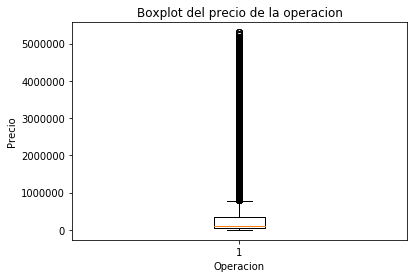

In [118]:
plt.boxplot(data_training['Total_Amount_USD'])
plt.title('Boxplot del precio de la operacion')
plt.ylabel('Precio')
plt.xlabel("Operacion")
plt.show()

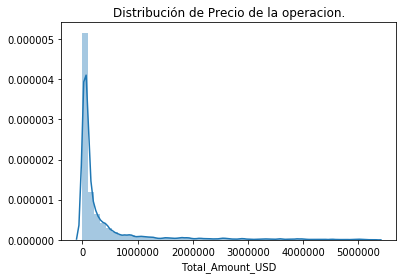

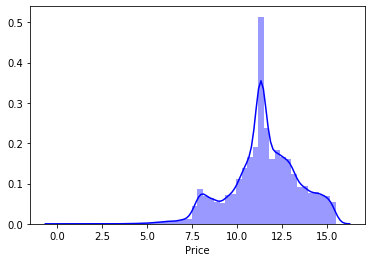

In [119]:
sns.distplot(data_training["Total_Amount_USD"])
plt.title('Distribución de Precio de la operacion.')
plt.show()

#Plot Log-Precio
sns.distplot(np.log(1+data_training["Total_Amount_USD"]),color='b')
plt.xlabel("Price")
plt.show()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

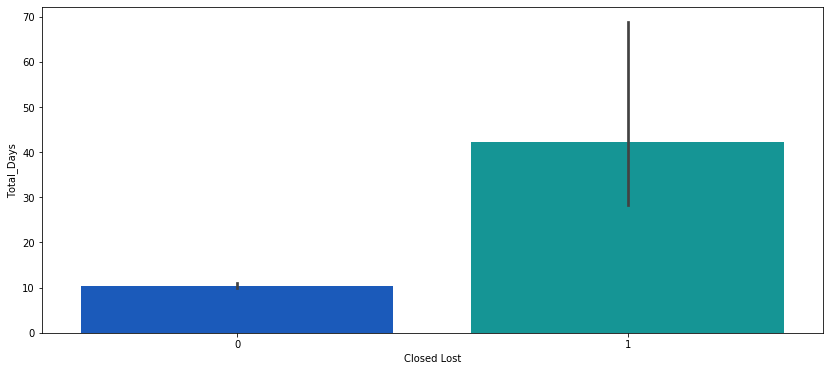

In [120]:
fig = plt.figure(figsize = (14,6))
sns.barplot(x = 'Closed Lost', y = 'Total_Days', data = data_training, palette="winter")
plt.xticks(rotation=0)

## 5-Modelos

#### 1- KNN con dataset reducido.

In [121]:
data_training_reduced= data_training[["TRF","Total_Amount_USD","Total_Days","Closed Lost"]]

In [40]:
data_training_reduced=pd.concat([region_dummy,data_training_reduced,opportunity_owner_dummy],axis=1)

In [41]:
data_training_reduced=data_training_reduced.dropna()

In [42]:
x_r=data_training_reduced.drop("Closed Lost",axis=1)

In [43]:
y_r=data_training_reduced["Closed Lost"]

In [44]:
y_r.head()

0    1.0
1    0.0
2    0.0
3    1.0
6    1.0
Name: Closed Lost, dtype: float64

In [45]:
xtrain_r,xtest_r,ytrain_r,ytest_r = train_test_split(x_r,y_r,test_size=0.25, random_state= 41)

In [46]:
scaler = preprocessing.StandardScaler().fit(xtrain_r)
scaler
xtrain_r_scal = scaler.transform(xtrain_r)  
xtest_r_scal = scaler.transform(xtest_r) 

In [48]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(xtrain_r_scal, ytrain_r)
score_knnf = neigh.score(xtest_r_scal, ytest_r)
pred_knnf=neigh.predict(xtest_r_scal)
score_knnf

0.7728257505416279

In [123]:
fpr1, tpr1, thresholds = roc_curve(ytest_r.astype('int'), pred_knnf, drop_intermediate = False)
auc_knnf = metrics.auc(fpr1, tpr1)
auc_knnf

0.7695585317653661

Los siguientes modelos seran realizados con el dataset con todas las variables preprocesadas.

In [71]:
data_training.head()

,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,TRF,Total_Taxable_Amount,Total_Amount_USD,Total_Days,Bureaucratic_Code_0,Bureaucratic_Code_1,...,Product_Family_91,Product_Family_92,Product_Family_93,Product_Family_94,Product_Family_95,Product_Family_96,Product_Family_97,Product_Family_98,Product_Family_99,Closed Lost
0,1,1,1,1,10,5272800.0,5964043.80,60.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,48230.0,54552.68,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,83865.6,83865.60,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,14,7421881.5,7421881.50,58.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,1,0,7,2659494.6,2659494.60,89.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [72]:
x=data_training.iloc[: , :393]

In [73]:
y=data_training.iloc[:,393:]

In [130]:
y.head()

,Closed Lost
0,1
1,0
2,0
3,1
6,1


In [131]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state= 41)

In [132]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [133]:
# auto scalo mis muestras de train utilizando el scaler fiteado con el xtrain
xtrain_scal = scaler.transform(xtrain)  

In [134]:
# auto scalo mis muestras de test utilizando el scaler fiteado con el xtrain
xtest_scal = scaler.transform(xtest) 

# PCA 

In [135]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=393)


#pca.n_components = 784
pca_data = pca.fit_transform(xtrain_scal)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

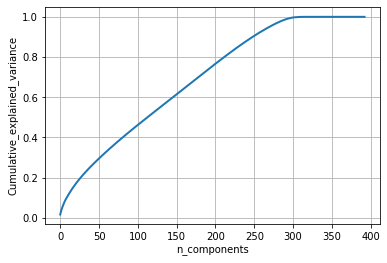

In [136]:
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
#plt.clf()
plt.plot(cum_var_explained, linewidth=2)
#plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [137]:
n_comp = 10
pca = PCA(n_components= n_comp)
xpca = pd.DataFrame(pca.fit_transform(xtrain_scal))
eigenvalues=pca.explained_variance_ratio_
eigenvalues


array([0.0170524 , 0.0144649 , 0.01360689, 0.01056118, 0.01000221,
       0.00932749, 0.00890238, 0.00785303, 0.00674007, 0.00663536])

Conclusion del PCA: No vale la pena utilizarlo ya que las componentes que mas variabilidad explican no apenas logran explicar un 1%.

#### 2- Random Forest 

In [176]:
parametros=[100, 500 , 1200]
parametross= [{'n_estimators': parametros}]

In [177]:
forest= RandomForestClassifier(verbose=3)

In [178]:
gforest = GridSearchCV(forest, param_grid=parametross, verbose=3)

In [180]:
gforest.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


MemoryError: could not allocate 1318846464 bytes

In [53]:
gforest.best_params_

{'n_estimators': 1200}

1200 es el mejor estimador

In [74]:
parametros=[1000, 1200, 1500,1800]
parametross= [{'n_estimators': parametros}]

In [75]:
forest2= RandomForestRegressor(verbose=6)

In [76]:
gforest2 = GridSearchCV(forest, param_grid=parametross, verbose=6)

In [77]:
gforest2.fit(xtrain_scal, ytrain.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_estimators=1000 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
buildin

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  8.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.1min remaining:    0.0s


[CV] ................... n_estimators=1000, score=0.554, total= 8.1min
[CV] n_estimators=1000 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
buildin

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  8.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 16.2min remaining:    0.0s


[CV] ................... n_estimators=1000, score=0.514, total= 8.1min
[CV] n_estimators=1000 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 1000


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
buildin

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  8.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 24.4min remaining:    0.0s


[CV] ................... n_estimators=1000, score=0.562, total= 8.1min
[CV] n_estimators=1200 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 1200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


building tree 3 of 1200
building tree 4 of 1200
building tree 5 of 1200
building tree 6 of 1200
building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200
building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building tree 41 of 1200
building tree 42 of 1200
buildin

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  9.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 34.1min remaining:    0.0s


[CV] ................... n_estimators=1200, score=0.555, total= 9.7min
[CV] n_estimators=1200 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 1200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


building tree 3 of 1200
building tree 4 of 1200
building tree 5 of 1200
building tree 6 of 1200
building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200
building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building tree 41 of 1200
building tree 42 of 1200
buildin

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  9.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 44.1min remaining:    0.0s


[CV] ................... n_estimators=1200, score=0.514, total=10.0min
[CV] n_estimators=1200 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 1200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 1200
building tree 4 of 1200
building tree 5 of 1200
building tree 6 of 1200
building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200
building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building tree 41 of 1200
building tree 42 of 1200
buildin

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 10.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    3.0s finished


[CV] ................... n_estimators=1200, score=0.563, total=10.2min
[CV] n_estimators=1500 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 1500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 1500
building tree 4 of 1500
building tree 5 of 1500
building tree 6 of 1500
building tree 7 of 1500
building tree 8 of 1500
building tree 9 of 1500
building tree 10 of 1500
building tree 11 of 1500
building tree 12 of 1500
building tree 13 of 1500
building tree 14 of 1500
building tree 15 of 1500
building tree 16 of 1500
building tree 17 of 1500
building tree 18 of 1500
building tree 19 of 1500
building tree 20 of 1500
building tree 21 of 1500
building tree 22 of 1500
building tree 23 of 1500
building tree 24 of 1500
building tree 25 of 1500
building tree 26 of 1500
building tree 27 of 1500
building tree 28 of 1500
building tree 29 of 1500
building tree 30 of 1500
building tree 31 of 1500
building tree 32 of 1500
building tree 33 of 1500
building tree 34 of 1500
building tree 35 of 1500
building tree 36 of 1500
building tree 37 of 1500
building tree 38 of 1500
building tree 39 of 1500
building tree 40 of 1500
building tree 41 of 1500
building tree 42 of 1500
buildin

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 12.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    4.2s finished


[CV] ................... n_estimators=1500, score=0.555, total=12.6min
[CV] n_estimators=1500 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 1500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 1500
building tree 4 of 1500
building tree 5 of 1500
building tree 6 of 1500
building tree 7 of 1500
building tree 8 of 1500
building tree 9 of 1500
building tree 10 of 1500
building tree 11 of 1500
building tree 12 of 1500
building tree 13 of 1500
building tree 14 of 1500
building tree 15 of 1500
building tree 16 of 1500
building tree 17 of 1500
building tree 18 of 1500
building tree 19 of 1500
building tree 20 of 1500
building tree 21 of 1500
building tree 22 of 1500
building tree 23 of 1500
building tree 24 of 1500
building tree 25 of 1500
building tree 26 of 1500
building tree 27 of 1500
building tree 28 of 1500
building tree 29 of 1500
building tree 30 of 1500
building tree 31 of 1500
building tree 32 of 1500
building tree 33 of 1500
building tree 34 of 1500
building tree 35 of 1500
building tree 36 of 1500
building tree 37 of 1500
building tree 38 of 1500
building tree 39 of 1500
building tree 40 of 1500
building tree 41 of 1500
building tree 42 of 1500
buildin

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 12.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    3.7s finished


[CV] ................... n_estimators=1500, score=0.513, total=12.1min
[CV] n_estimators=1500 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 1500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


building tree 3 of 1500
building tree 4 of 1500
building tree 5 of 1500
building tree 6 of 1500
building tree 7 of 1500
building tree 8 of 1500
building tree 9 of 1500
building tree 10 of 1500
building tree 11 of 1500
building tree 12 of 1500
building tree 13 of 1500
building tree 14 of 1500
building tree 15 of 1500
building tree 16 of 1500
building tree 17 of 1500
building tree 18 of 1500
building tree 19 of 1500
building tree 20 of 1500
building tree 21 of 1500
building tree 22 of 1500
building tree 23 of 1500
building tree 24 of 1500
building tree 25 of 1500
building tree 26 of 1500
building tree 27 of 1500
building tree 28 of 1500
building tree 29 of 1500
building tree 30 of 1500
building tree 31 of 1500
building tree 32 of 1500
building tree 33 of 1500
building tree 34 of 1500
building tree 35 of 1500
building tree 36 of 1500
building tree 37 of 1500
building tree 38 of 1500
building tree 39 of 1500
building tree 40 of 1500
building tree 41 of 1500
building tree 42 of 1500
buildin

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 14.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.2s finished


[CV] ................... n_estimators=1500, score=0.562, total=15.0min
[CV] n_estimators=1800 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 1800


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


building tree 3 of 1800
building tree 4 of 1800
building tree 5 of 1800
building tree 6 of 1800
building tree 7 of 1800
building tree 8 of 1800
building tree 9 of 1800
building tree 10 of 1800
building tree 11 of 1800
building tree 12 of 1800
building tree 13 of 1800
building tree 14 of 1800
building tree 15 of 1800
building tree 16 of 1800
building tree 17 of 1800
building tree 18 of 1800
building tree 19 of 1800
building tree 20 of 1800
building tree 21 of 1800
building tree 22 of 1800
building tree 23 of 1800
building tree 24 of 1800
building tree 25 of 1800
building tree 26 of 1800
building tree 27 of 1800
building tree 28 of 1800
building tree 29 of 1800
building tree 30 of 1800
building tree 31 of 1800
building tree 32 of 1800
building tree 33 of 1800
building tree 34 of 1800
building tree 35 of 1800
building tree 36 of 1800
building tree 37 of 1800
building tree 38 of 1800
building tree 39 of 1800
building tree 40 of 1800
building tree 41 of 1800
building tree 42 of 1800
buildin

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 22.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    9.3s finished


[CV] ................... n_estimators=1800, score=0.555, total=22.2min
[CV] n_estimators=1800 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


building tree 2 of 1800


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


building tree 3 of 1800
building tree 4 of 1800
building tree 5 of 1800
building tree 6 of 1800
building tree 7 of 1800
building tree 8 of 1800
building tree 9 of 1800
building tree 10 of 1800
building tree 11 of 1800
building tree 12 of 1800
building tree 13 of 1800
building tree 14 of 1800
building tree 15 of 1800
building tree 16 of 1800
building tree 17 of 1800
building tree 18 of 1800
building tree 19 of 1800
building tree 20 of 1800
building tree 21 of 1800
building tree 22 of 1800
building tree 23 of 1800
building tree 24 of 1800
building tree 25 of 1800
building tree 26 of 1800
building tree 27 of 1800
building tree 28 of 1800
building tree 29 of 1800
building tree 30 of 1800
building tree 31 of 1800
building tree 32 of 1800
building tree 33 of 1800
building tree 34 of 1800
building tree 35 of 1800
building tree 36 of 1800
building tree 37 of 1800
building tree 38 of 1800
building tree 39 of 1800
building tree 40 of 1800
building tree 41 of 1800
building tree 42 of 1800
buildin

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 15.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    4.6s finished


[CV] ................... n_estimators=1800, score=0.514, total=15.6min
[CV] n_estimators=1800 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1800


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 1800


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


building tree 3 of 1800
building tree 4 of 1800
building tree 5 of 1800
building tree 6 of 1800
building tree 7 of 1800
building tree 8 of 1800
building tree 9 of 1800
building tree 10 of 1800
building tree 11 of 1800
building tree 12 of 1800
building tree 13 of 1800
building tree 14 of 1800
building tree 15 of 1800
building tree 16 of 1800
building tree 17 of 1800
building tree 18 of 1800
building tree 19 of 1800
building tree 20 of 1800
building tree 21 of 1800
building tree 22 of 1800
building tree 23 of 1800
building tree 24 of 1800
building tree 25 of 1800
building tree 26 of 1800
building tree 27 of 1800
building tree 28 of 1800
building tree 29 of 1800
building tree 30 of 1800
building tree 31 of 1800
building tree 32 of 1800
building tree 33 of 1800
building tree 34 of 1800
building tree 35 of 1800
building tree 36 of 1800
building tree 37 of 1800
building tree 38 of 1800
building tree 39 of 1800
building tree 40 of 1800
building tree 41 of 1800
building tree 42 of 1800
buildin

[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed: 14.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 146.9min finished


[CV] ................... n_estimators=1800, score=0.561, total=15.1min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 1200


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 1200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


building tree 3 of 1200
building tree 4 of 1200
building tree 5 of 1200
building tree 6 of 1200
building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200
building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building tree 41 of 1200
building tree 42 of 1200
buildin

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed: 15.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=3, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'n_estimators': [1000, 12

In [79]:
forest_12= RandomForestClassifier(n_estimators=1200, verbose=7)

In [80]:
forest_12.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 1200
building tree 2 of 1200


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


building tree 3 of 1200
building tree 4 of 1200


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


building tree 5 of 1200
building tree 6 of 1200


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s


building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200
building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building tree 41 of 1200
building tree 42 of 1200
building tree 43 of 1200
building tree 44 of 1200
building tree 45 of 1200
building tree 46 of 1200
bui

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  2.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=7, warm_start=False)

In [81]:
ypred_forest= forest_12.predict(xtest_scal)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    6.1s finished


In [221]:
score = forest_12.score(xtest_scal, ytest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:    5.3s finished


In [222]:
score

0.8597957288765088

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred_forest)
print(cm)

[[1611  215]
 [ 239 1166]]


In [83]:
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), ypred_forest, drop_intermediate = False)
auc_forest = metrics.auc(fpr1, tpr1)
auc_forest

0.8560747681765561

#### 3-KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
# KNN
neigh = KNeighborsClassifier()
parameters_k = np.arange(10,86,5)
parameters_knn = [{'n_neighbors': parameters_k}]
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs1 = GridSearchCV(neigh, param_grid=parameters_knn,refit=True,verbose=4)


In [60]:
gs1.fit(xtrain_scal, ytrain.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.738, total=  35.1s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.0s remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.742, total=  34.6s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.738, total=  34.6s
[CV] n_neighbors=15 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV] ...................... n_neighbors=15, score=0.723, total=  36.7s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.720, total=  36.4s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.726, total=  36.5s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.706, total=  38.4s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.714, total=  37.6s
[CV] n_neighbors=20 ..................................................
[CV] ...................... n_neighbors=20, score=0.712, total=  37.7s
[CV] n_neighbors=25 ..................................................
[CV] ...................... n_neighbors=25, score=0.712, total=  38.9s
[CV] n_neighbors=25 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 32.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [61]:
gs1.best_params_

{'n_neighbors': 10}

10 es el mejor parametro

In [283]:
# KNN
neigh = KNeighborsClassifier()
parameters_k = np.arange(1,11,2)
parameters_knn = [{'n_neighbors': parameters_k}]
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs2 = GridSearchCV(neigh, param_grid=parameters_knn,refit=True,verbose=5)


In [285]:
gs2.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.732, total=   3.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=1, score=0.716, total=   3.7s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=1, score=0.718, total=   5.8s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.6s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=3, score=0.721, total=   6.1s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.7s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=3, score=0.729, total=   7.6s
[CV] n_neighbors=3 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=3, score=0.723, total=   8.3s
[CV] n_neighbors=5 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=5, score=0.720, total=   6.9s
[CV] n_neighbors=5 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=5, score=0.713, total=   5.7s
[CV] n_neighbors=5 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=5, score=0.727, total=  12.0s
[CV] n_neighbors=7 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=7, score=0.716, total=   6.2s
[CV] n_neighbors=7 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=7, score=0.709, total=   5.8s
[CV] n_neighbors=7 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=7, score=0.705, total=   5.9s
[CV] n_neighbors=9 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=9, score=0.719, total=   6.0s
[CV] n_neighbors=9 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=9, score=0.706, total=   5.6s
[CV] n_neighbors=9 ...................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=9, score=0.703, total=   6.1s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': array([1, 3, 5, 7, 9])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [286]:
gs2.best_params_

{'n_neighbors': 3}

3 es el mejor parametro

In [73]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [74]:
neigh.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [75]:
pred2=neigh.predict(xtest_scal)

In [76]:
score_knn = neigh.score(xtest_scal, ytest)

In [77]:
score_knn

0.7777777777777778

In [78]:
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), pred2, drop_intermediate = False)
auc_knn = metrics.auc(fpr1, tpr1)
auc_knn

0.7695090293233758

In [229]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, pred2)
print(cm)

[[1521  305]
 [ 413  992]]


#### 4-Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
parameters = {'C':[1, 80, 100, 120]}
lr_model = LogisticRegression(random_state=0, solver='lbfgs')
clf_lr = GridSearchCV(lr_model, param_grid = parameters, refit = True, cv = 5)

In [55]:
clf_lr.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validatio

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [1, 80, 100, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [56]:
clf_lr.best_params_

{'C': 100}

In [69]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

logisticRegr = LogisticRegression(solver = 'lbfgs', C=100)
logisticRegr.fit(xtrain_scal, ytrain)
pred_lr= logisticRegr.predict(xtest_scal)

score_100 = logisticRegr.score(xtest_scal, ytest)
print("Score:", score_100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score: 0.7610646858557722


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [72]:
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), pred_lr, drop_intermediate = False)
auc_lr = metrics.auc(fpr1, tpr1)
auc_lr

0.7514406379968273

#### 5- Support Vector Classifier

In [44]:
svc = SVC()
svc.fit(xtrain_scal, ytrain)
pred_svc = svc.predict(xtest_scal)
param = {
    'C': [0.1,1,3],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,1.3]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
grid_svc.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 3], 'gamma': [0.1, 0.8, 1.3],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [47]:
grid_svc.best_params_

{'C': 3, 'gamma': 0.1, 'kernel': 'linear'}

In [59]:
svc = SVC(C=3, gamma=0.1, kernel= "linear")

In [60]:
svc.fit(xtrain_scal, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
ypred_svc=svc.predict(xtest_scal)

In [62]:
score_svc = svc.score(xtest_scal, ytest)

In [63]:
score_svc

0.766016713091922

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred_svc)
print(cm)

[[1514  312]
 [ 444  961]]


In [68]:
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), ypred_svc, drop_intermediate = False)
auc_svc = metrics.auc(fpr1, tpr1)
auc_svc


0.7565602429127706

# 6- Resumen de los datos y conclusiones

In [132]:
pd.DataFrame(data = [["KNN_r",0.7728257505416279 ,0.7695585317653661],
                     ["Random Forest", 0.8597957288765088, 0.8560747681765561],
                     ["KNN", 0.7777777777777778, 0.7695090293233758],
                     ["Logistic Regression", 0.7610646858557722,0.7514406379968273],
                    ["SVC", 0.766016713091922,0.7565602429127706]],
             columns = ['Modelo',
                      'Accuracy', 
                      'AUC'])

,Modelo,Accuracy,AUC
0,KNN_r,0.772826,0.769559
1,Random Forest,0.859796,0.856075
2,KNN,0.777778,0.769509
3,Logistic Regression,0.761065,0.751441
4,SVC,0.766017,0.756560


Conclusion: El modelo que se utilizara sera el Random Forest ya que logra un accuracy muy superior respecto de los otros modelos siendo dicho valor 0.8597957288765088.
    